## Simple Linear Regression
- YearExperience is predictor(feature)
- Salary is prediction(Target variable)
- using feature we will predict target
- as we are using only one feature i.e. YearExperience to predict target i.e. salary this is SLR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


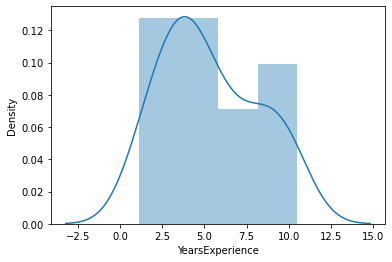

In [4]:
sns.distplot(df["YearsExperience"])
plt.show()

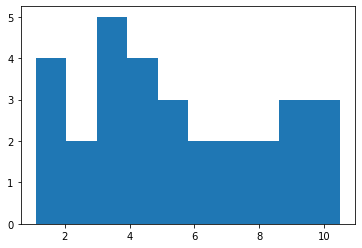

In [5]:
plt.hist(df["YearsExperience"])
plt.show()

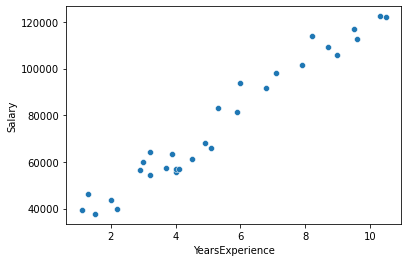

In [6]:
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"])
plt.show()

In [7]:
## split the dataset in 
y = df.pop("Salary")
X = df

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [10]:
X_train

,YearsExperience
21,7.1
0,1.1
19,6.0
24,8.7
27,9.6
12,4.0
4,2.2
2,1.5
29,10.5
22,7.9


In [11]:
y_train

21     98273.0
0      39343.0
19     93940.0
24    109431.0
27    112635.0
12     56957.0
4      39891.0
2      37731.0
29    121872.0
22    101302.0
14     61111.0
3      43525.0
1      46205.0
10     63218.0
26    116969.0
18     81363.0
5      56642.0
7      54445.0
15     67938.0
16     66029.0
25    105582.0
Name: Salary, dtype: float64

In [12]:
# instance of a model
# training the model
# using the trained model we will find prediction
# we will evaluate the model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# instance of a model
lr = LinearRegression()

In [15]:
# training the model
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
# using the trained model we will find prediction
y_pred = lr.predict(X_test)
y_pred

array([102232.35515048,  89179.12320546, 121812.203068  ,  55613.66963256,
        53748.92221184,  64005.03302579,  63072.65931543,  60275.53818435,
        75193.51755009])

In [17]:
y_test

23    113812.0
20     91738.0
28    122391.0
8      64445.0
6      60150.0
13     57081.0
11     55794.0
9      57189.0
17     83088.0
Name: Salary, dtype: float64

In [18]:
# we will evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
score = r2_score(y_test,y_pred)
score

0.9188521317201364

In [20]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [21]:
print(rmse)

6933.877462428582


In [22]:
# beta-coefficient of YearsExperience :beta1
lr.coef_

array([9323.73710358])

In [23]:
# beta-coefficient of constant :beta0
lr.intercept_

25777.71090109225

In [24]:
pred = 26778.29 + 9184.07*6.0
pred

81882.70999999999

In [25]:
y_pred

array([102232.35515048,  89179.12320546, 121812.203068  ,  55613.66963256,
        53748.92221184,  64005.03302579,  63072.65931543,  60275.53818435,
        75193.51755009])

In [26]:
y_test

23    113812.0
20     91738.0
28    122391.0
8      64445.0
6      60150.0
13     57081.0
11     55794.0
9      57189.0
17     83088.0
Name: Salary, dtype: float64

# check assumption of linear regression.

In [28]:
y_pred_train = lr.predict(X_train)

In [29]:
Residual = y_train - y_pred_train

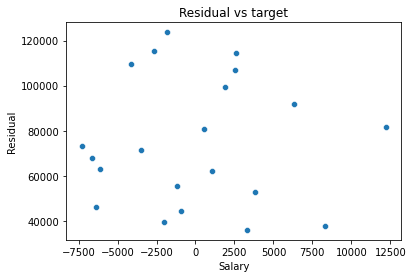

In [30]:
sns.scatterplot(x=Residual,y=y_pred_train)
plt.xlabel('Salary')
plt.ylabel('Residual')
plt.title('Residual vs target')
plt.show()

# overfit / underfit

In [69]:
# lr = LinearRegression()
# lr.fit(X_train,y_train)

In [31]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [34]:
score_train = r2_score(y_train,y_pred_train)
score_test = r2_score(y_test,y_pred_test)

In [35]:
print(score_train,score_test)

0.9680729690807617 0.9188521317201364


# saving the model

In [80]:
import pickle

In [ ]:
## save the model

In [ ]:
model_file = 'linear_salary_model.sav'

In [ ]:
file = open(model_file,'wb')

In [ ]:
pickle.dump(lr,file)

In [ ]:
file.close()

In [ ]:
## reload the model

In [ ]:
file1 = open(model_file,'rb')

In [ ]:
print(file1)

In [ ]:
lr1 = pickle.load(file1)

# predicting unseen data

In [ ]:
X_unseen = np.array([[6,2],[5,3]])

In [ ]:
y_unseen = lr1.predict(unseen_data)

In [ ]:
y_unseen